In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")


In [4]:
print(data.head())      # View the first few rows
print(data.info())      # Data types and missing values
print(data.describe())  # Statistical summary


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [5]:
print(data.isnull().sum())  # Check for missing values


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
X = data.drop("Diabetes_012", axis=1)  # Features
y = data["Diabetes_012"]               # Target variable


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [13]:
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.845454903815831
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



C:\Users\User\PycharmProjects\pythonProject1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\PycharmProjects\pythonProject1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\PycharmProjects\pythonProject1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

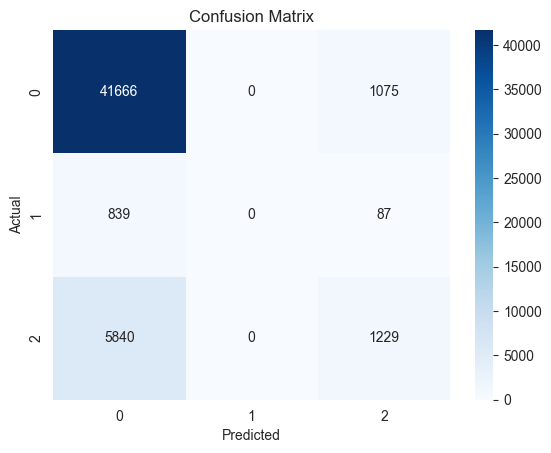

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
lr_model = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


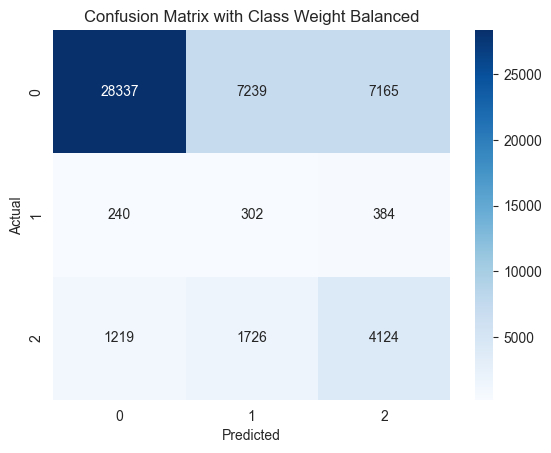

In [19]:
from sklearn.metrics import confusion_matrix
cm_balanced = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Class Weight Balanced')
plt.show()


In [24]:
from sklearn.metrics import classification_report
print("Classification Report with class weight balanced:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report with class weight balanced:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42741
         1.0       0.03      0.33      0.06       926
         2.0       0.35      0.58      0.44      7069

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736



In [16]:
feature_names = data.drop("Diabetes_012", axis=1).columns
coefficients = lr_model.coef_[0]  # Coefficients for the first class
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print(feature_importance)


                 Feature  Coefficient
20                Income     0.100381
10     HvyAlcoholConsump     0.073575
15              PhysHlth     0.035322
19             Education     0.035157
8                 Fruits     0.016650
7           PhysActivity     0.015588
9                Veggies     0.009196
16              DiffWalk     0.002285
4                 Smoker     0.000751
11         AnyHealthcare    -0.002888
5                 Stroke    -0.003346
14              MentHlth    -0.011911
6   HeartDiseaseorAttack    -0.021572
12           NoDocbcCost    -0.043520
17                   Sex    -0.061244
2              CholCheck    -0.134487
0                 HighBP    -0.183121
1               HighChol    -0.197906
3                    BMI    -0.318092
18                   Age    -0.320388
13               GenHlth    -0.343884


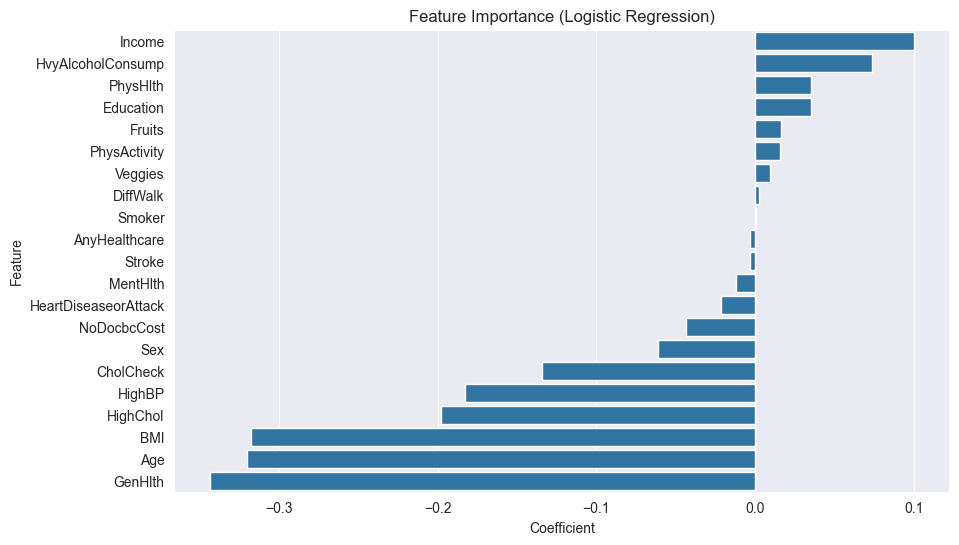

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


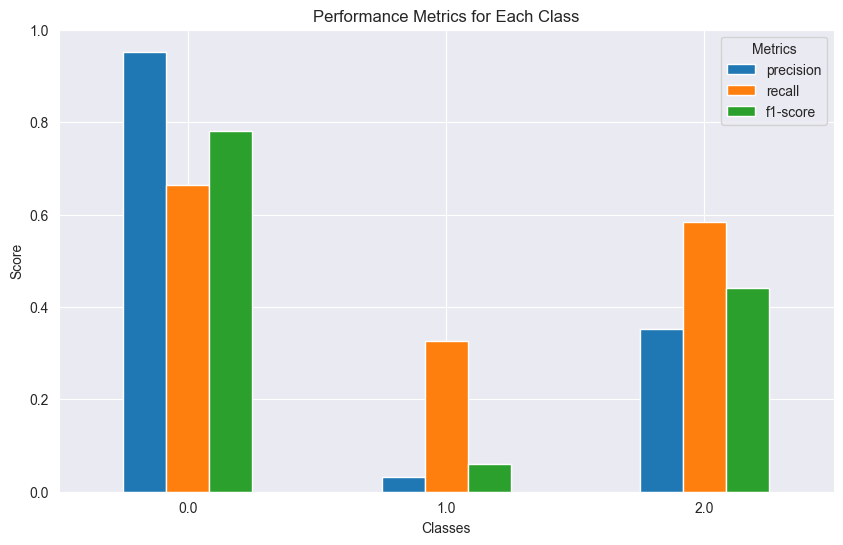

In [22]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Ensure the correct class labels are selected
class_labels = [str(i) for i in sorted(set(y_test))]  # Automatically get unique class labels
metrics = report_df.loc[class_labels, ['precision', 'recall', 'f1-score']]

# Create a bar plot
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for Each Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Scores range between 0 and 1
plt.legend(title='Metrics')
plt.show()


Classification Report After SMOTE:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42741
         1.0       0.03      0.32      0.06       926
         2.0       0.35      0.57      0.44      7069

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.42     50736
weighted avg       0.85      0.64      0.72     50736



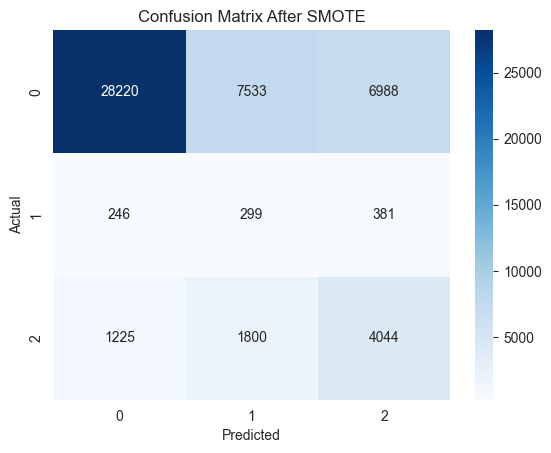

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on the resampled dataset
lr_smote = LogisticRegression(max_iter=500, random_state=42)
lr_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_smote = lr_smote.predict(X_test)

# Evaluate the model after SMOTE
print("Classification Report After SMOTE:")
print(classification_report(y_test, y_pred_smote, zero_division=0))

# Generate confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After SMOTE')
plt.show()
